<a href="https://colab.research.google.com/github/shoreey/Assessing-the-Impact-of-Micro-Plastic-on-Marine-Ecosystem/blob/main/Assessing_the_Impact_of_Plastic_and_Microplastics_on_Marine_Ecosystems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns in the dataset:
OBJECTID
Oceans
Regions
SubRegions
Sampling Method
Measurement
Unit
Density Range
Density Class
Short Reference
Long Reference
DOI
Organization
Keywords
Accession Number
Accession Link
Latitude
Longitude
Date
GlobalID
x
y


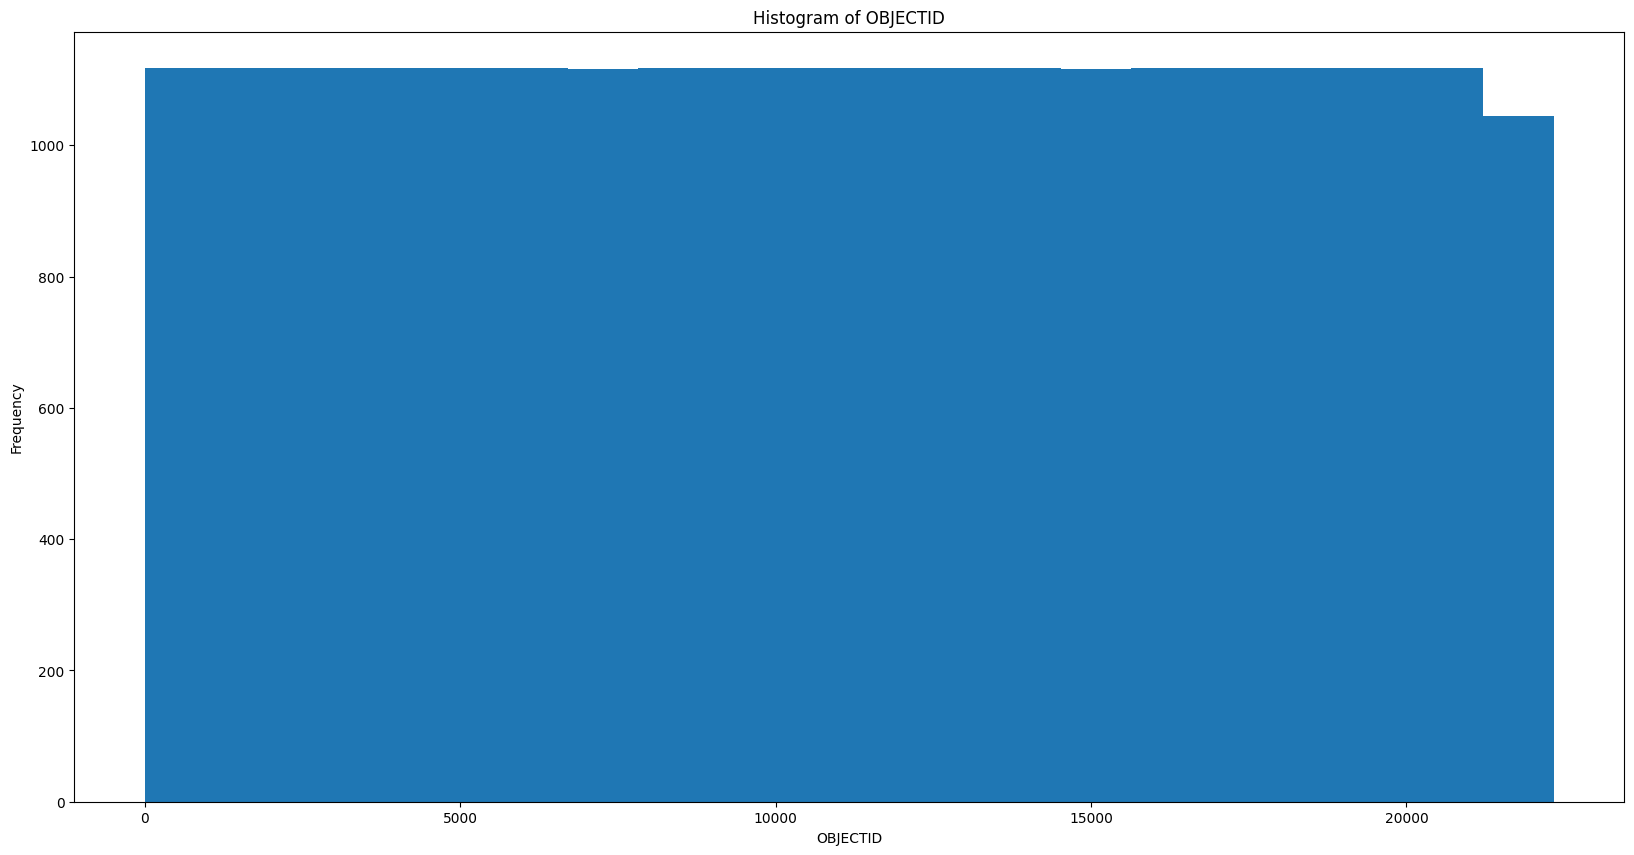

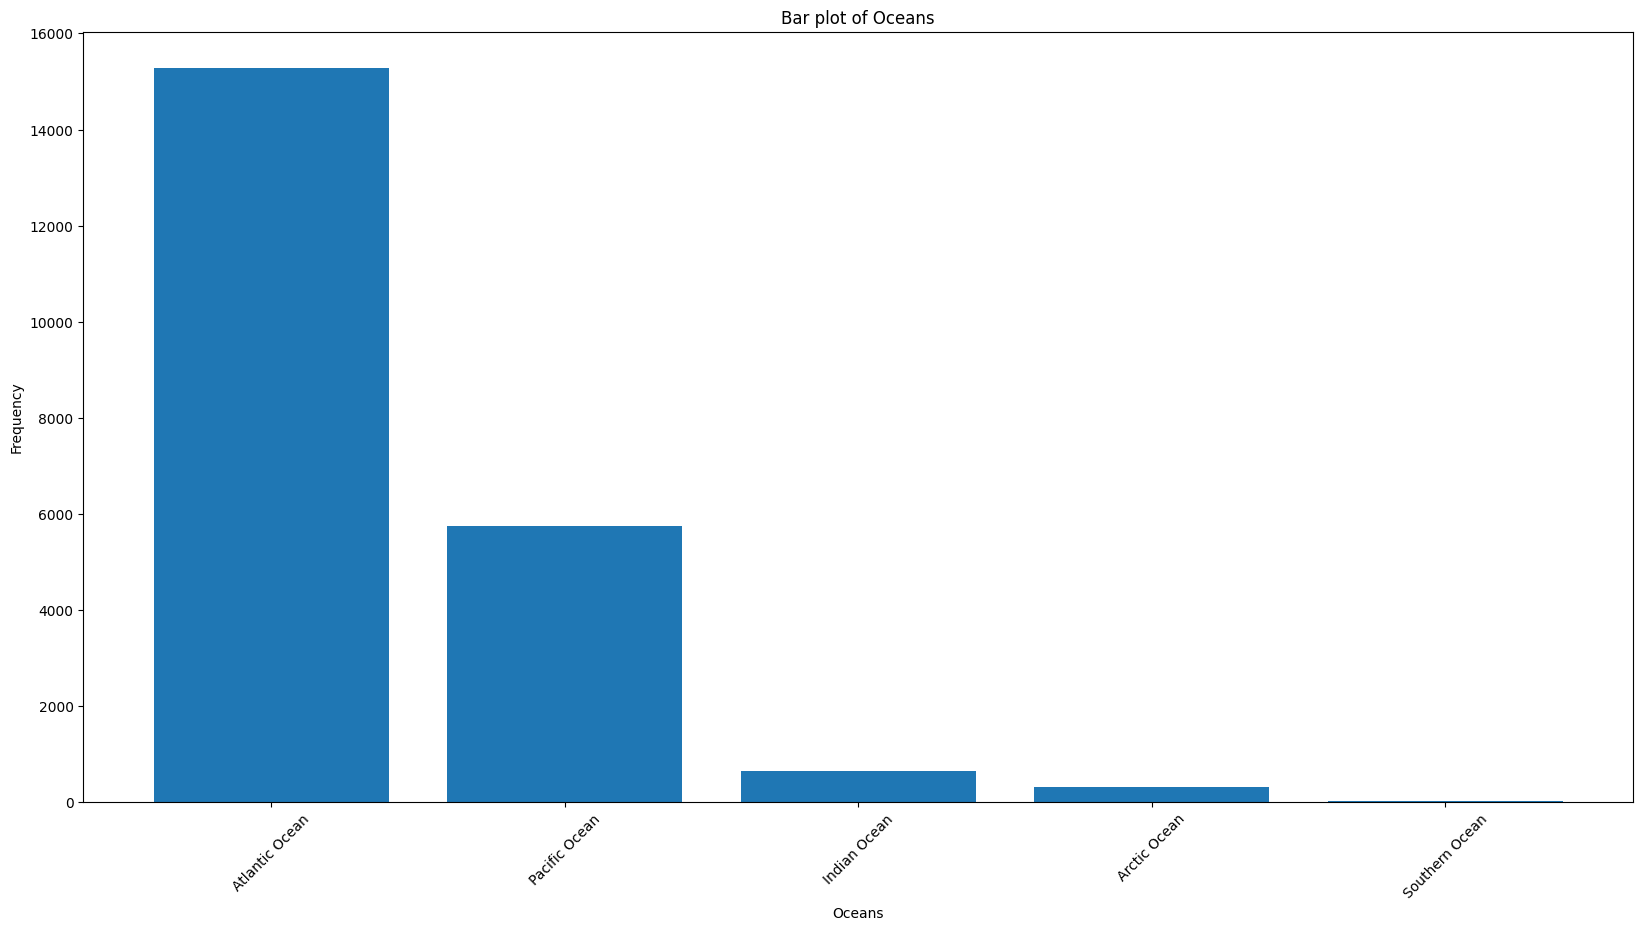

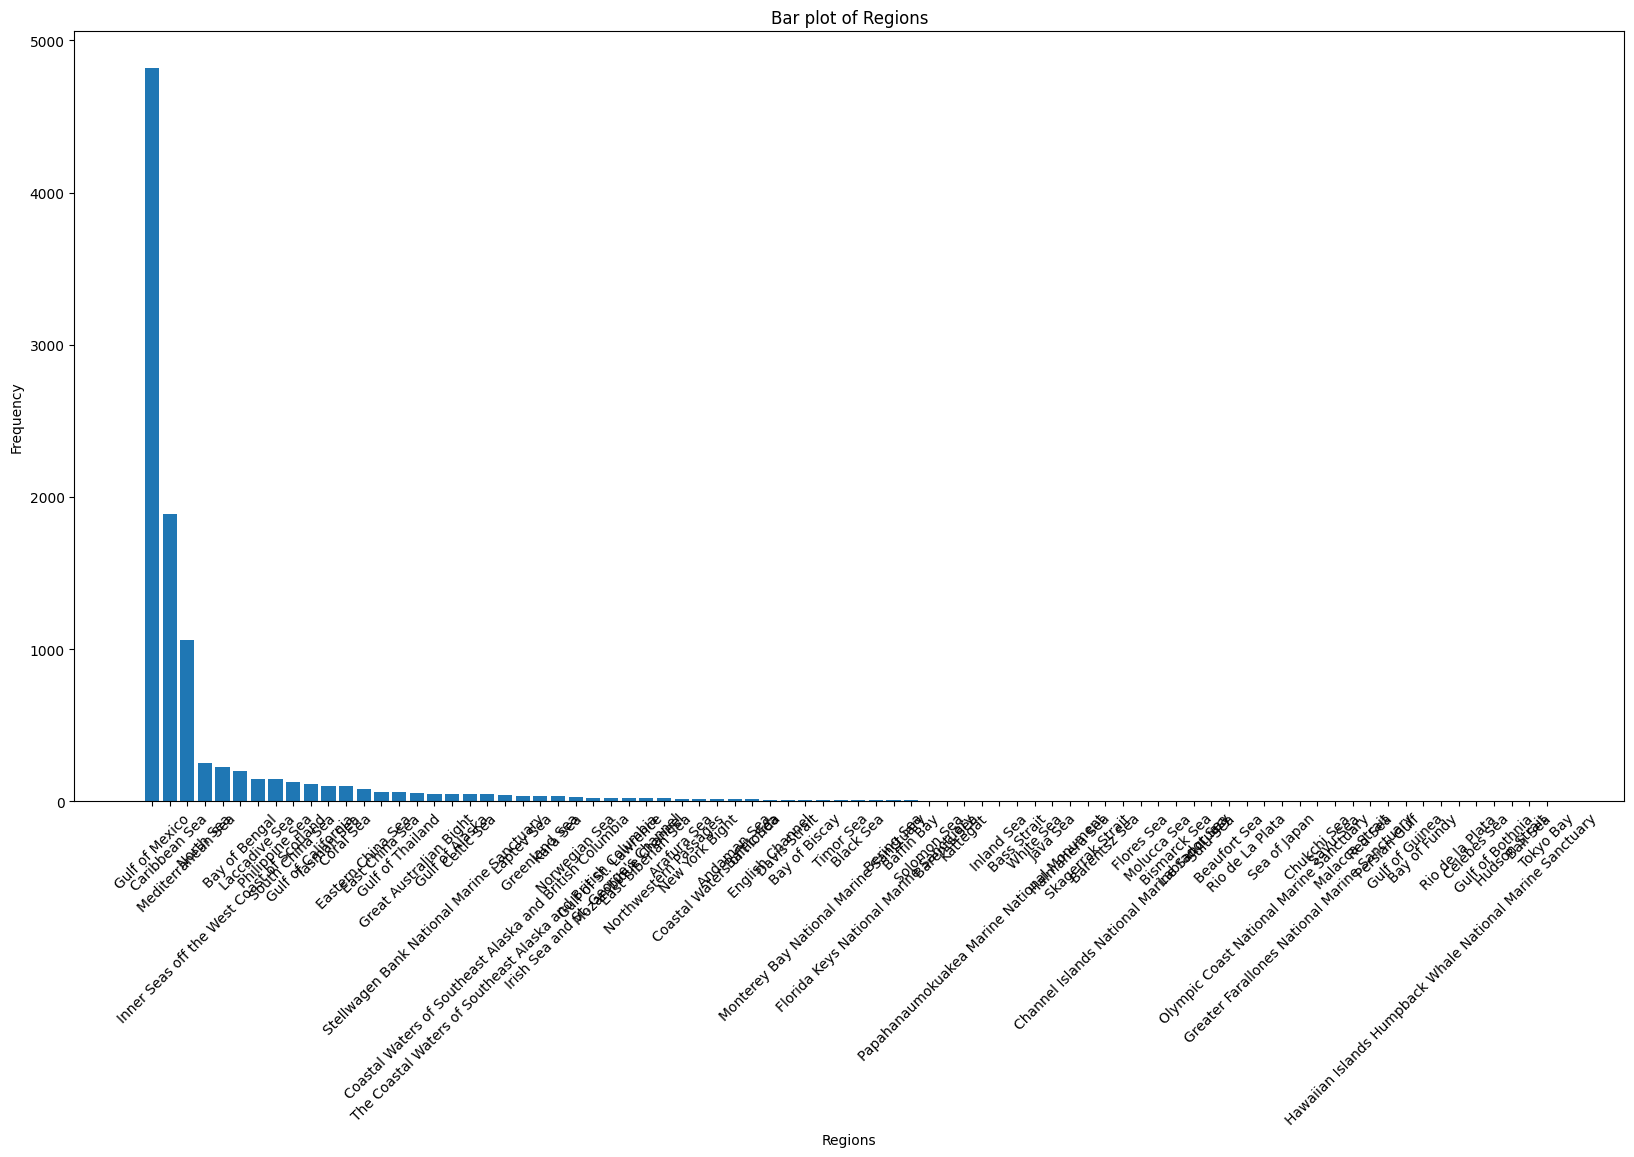

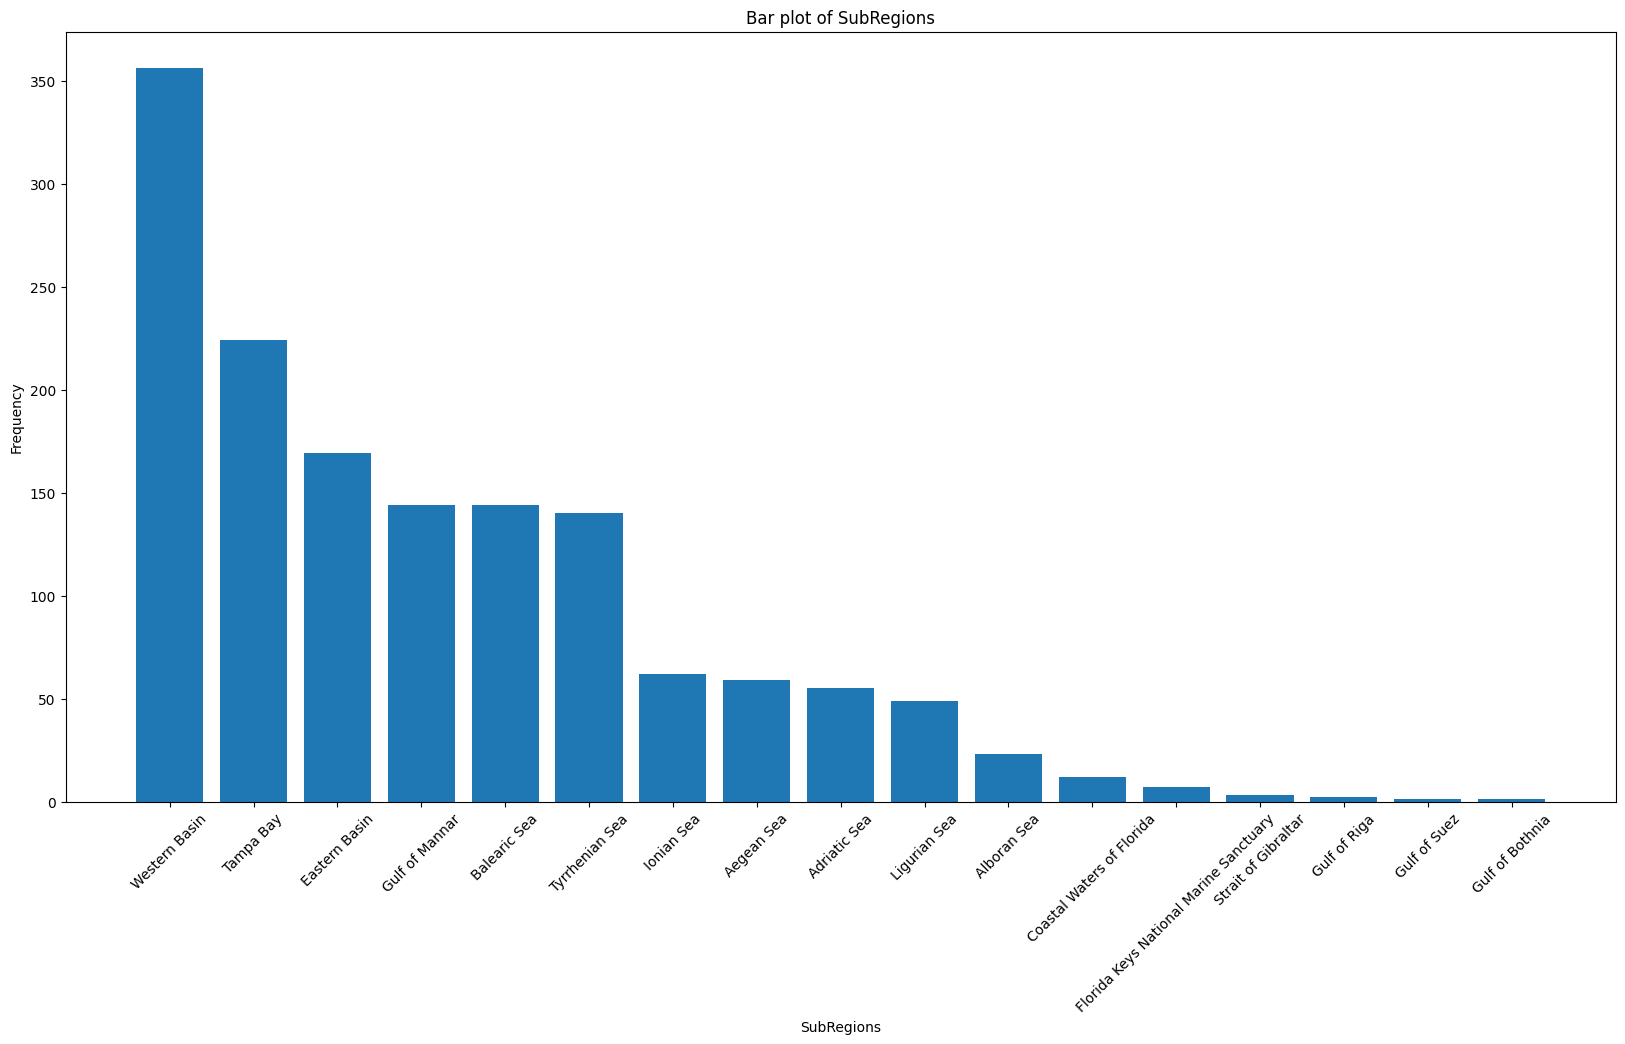

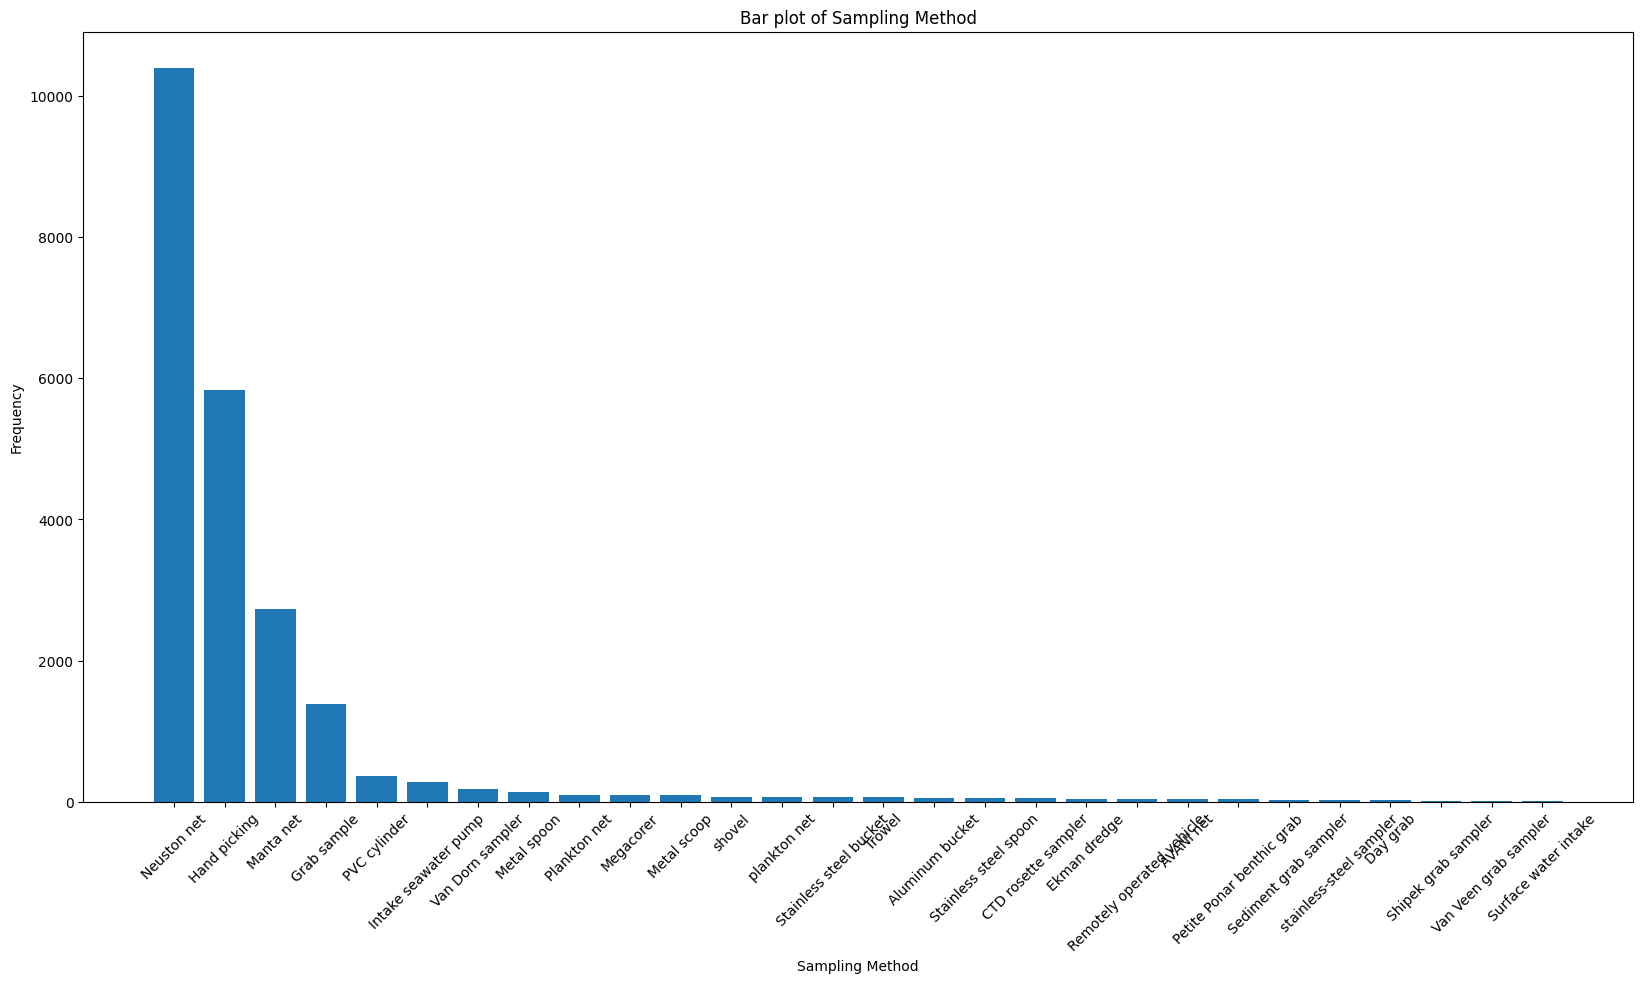

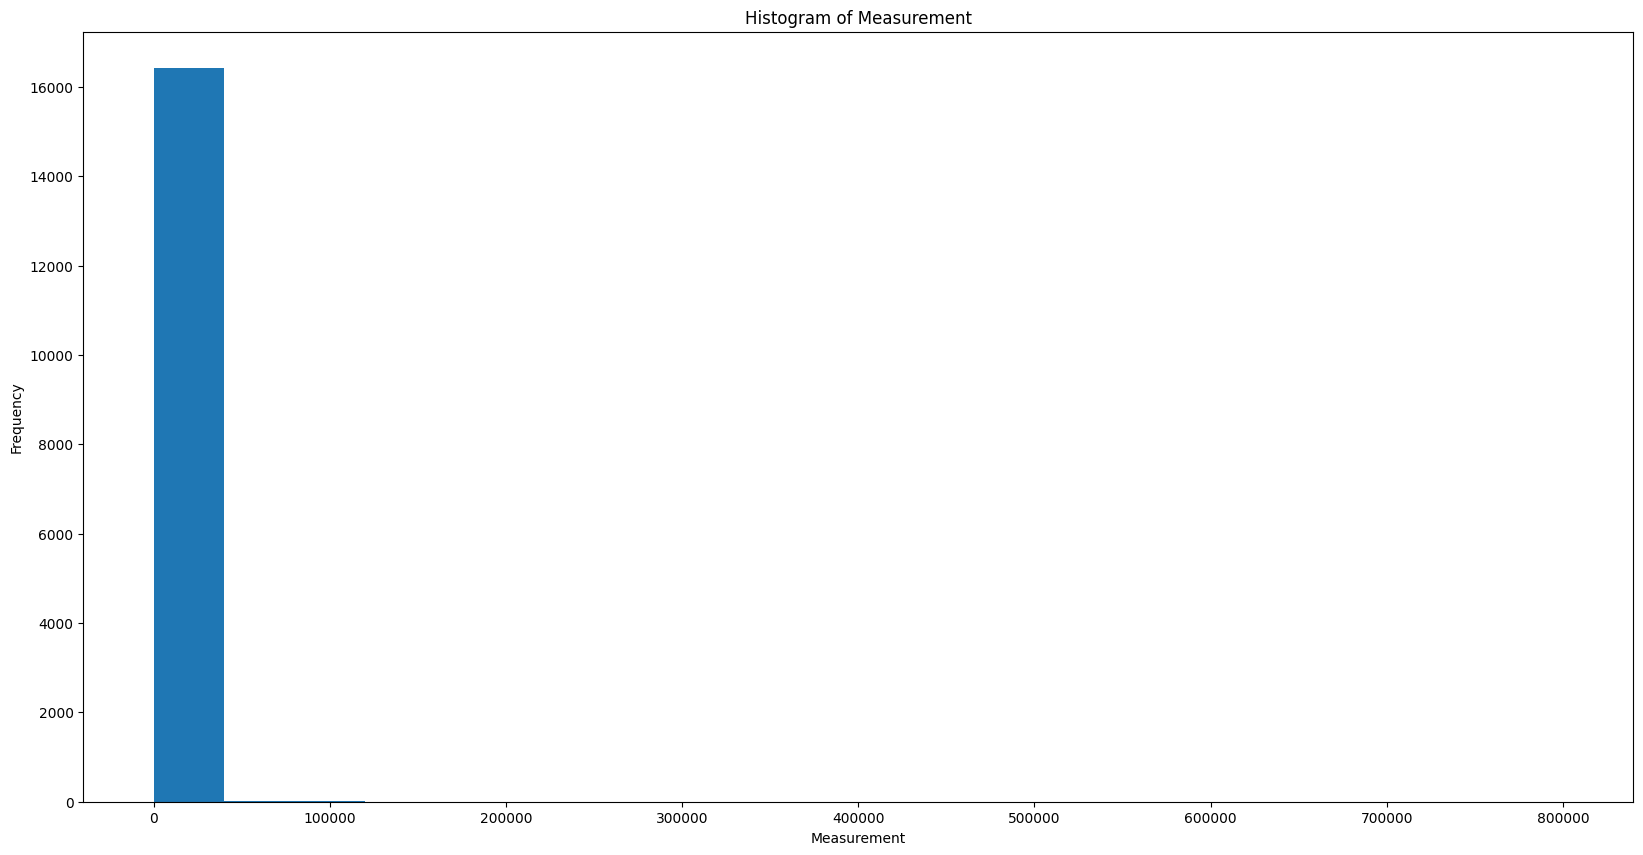

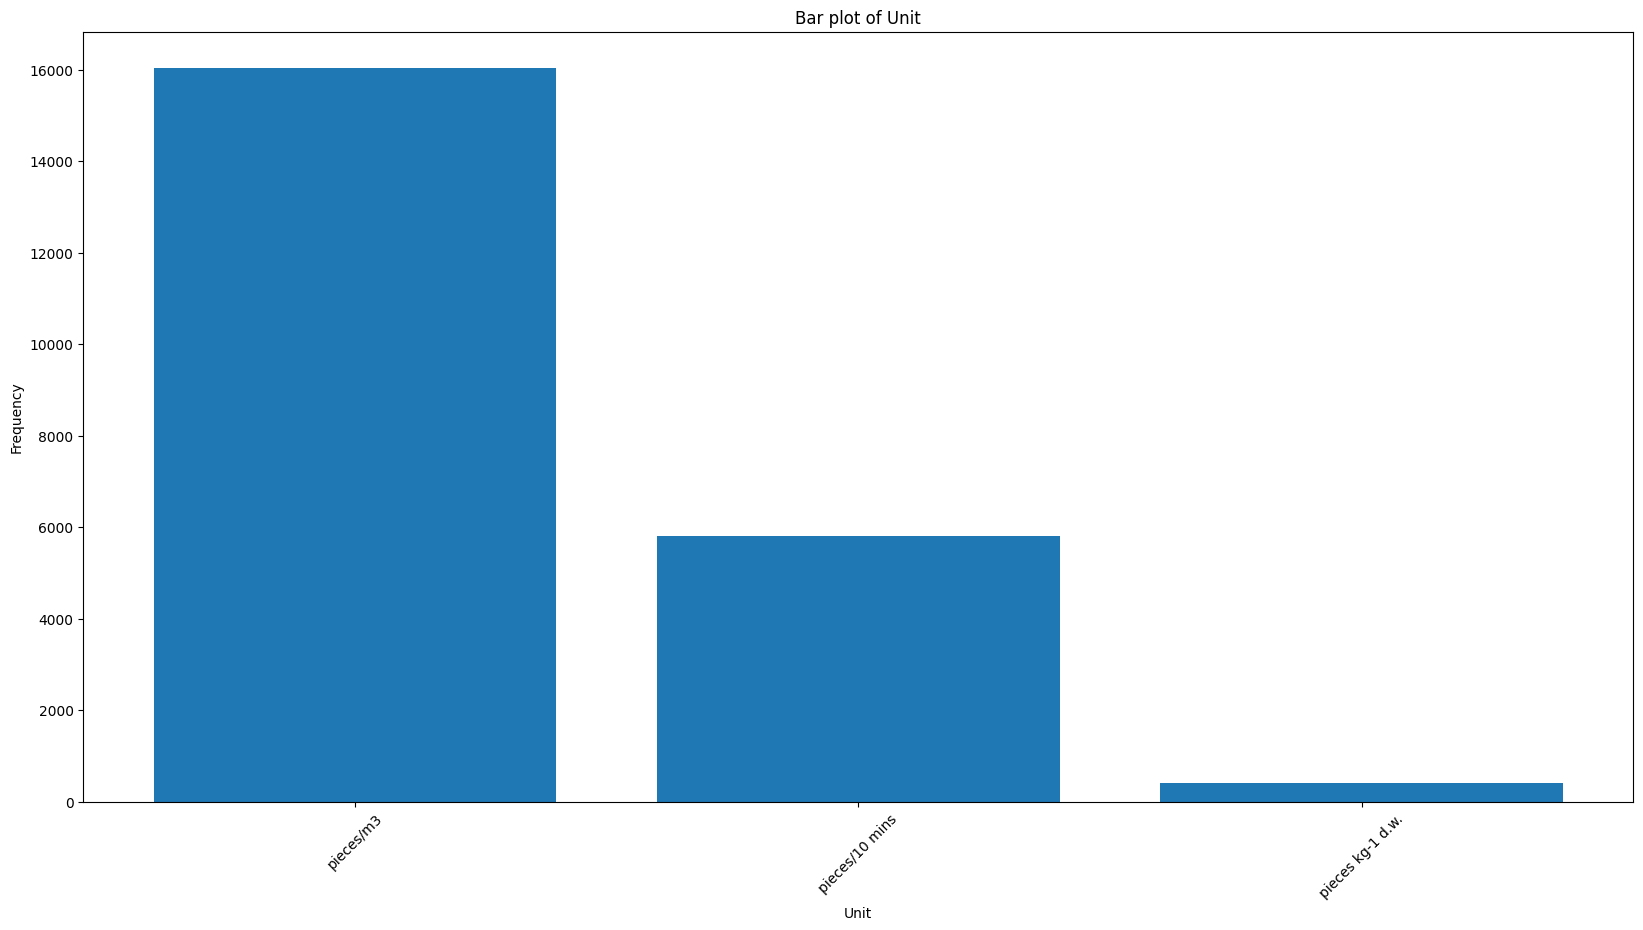

TypeError: 'value' must be an instance of str or bytes, not a datetime.datetime

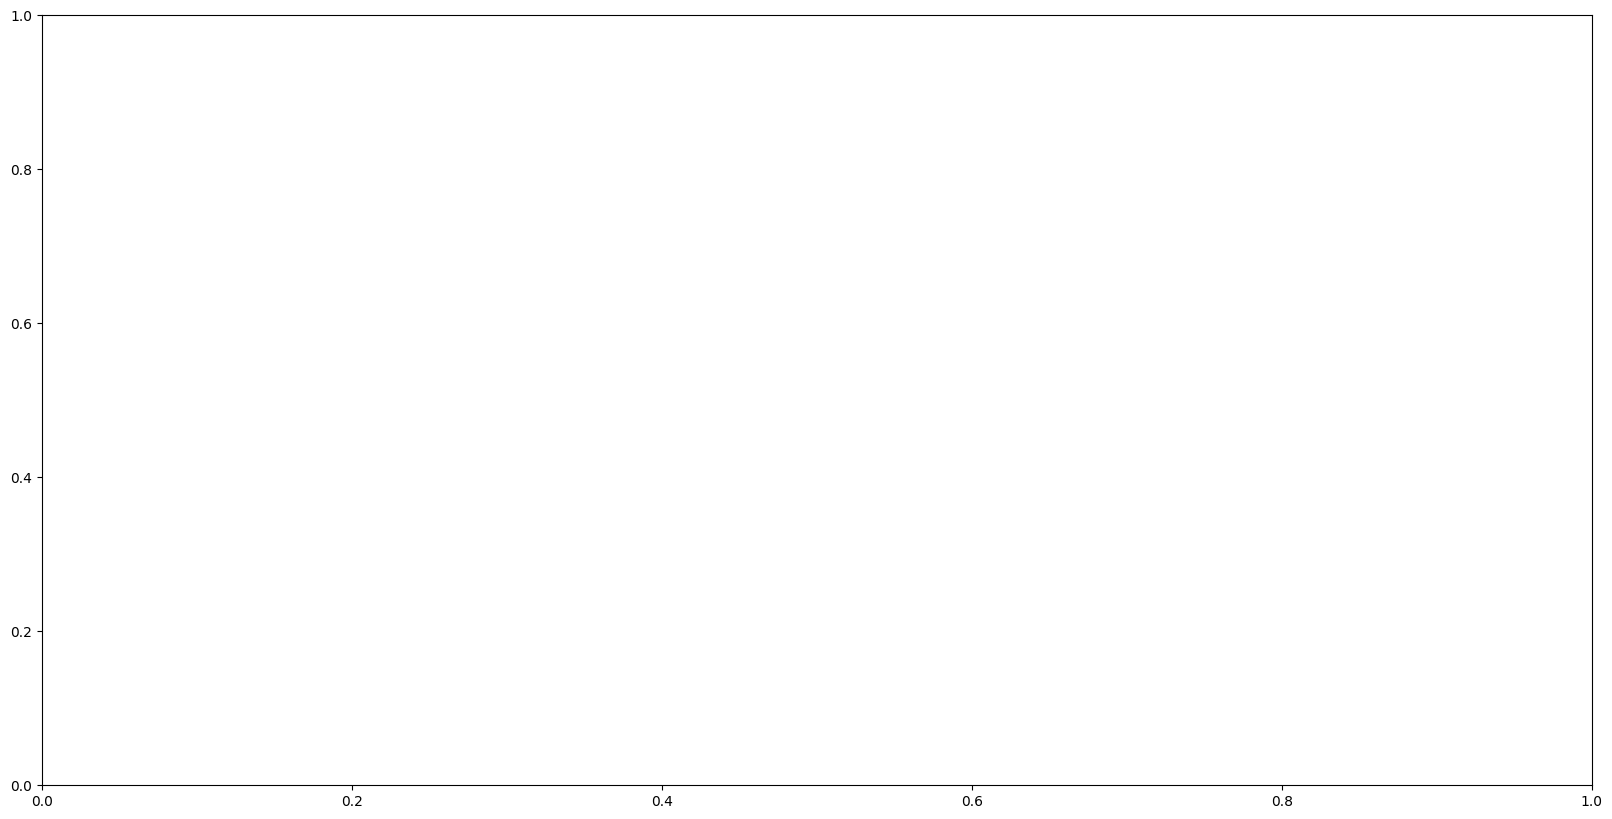

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"E:\Marine_Microplastics_WGS84_5159774935198085819.xlsx"
df = pd.read_excel(file_path)

# Print the columns
print("Columns in the dataset:")
for col in df.columns:
    print(col)

# Plot each column
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Plot only numerical columns
        plt.figure(figsize=(20, 10))
        plt.hist(df[col], bins=20)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    else:
        plt.figure(figsize=(20, 10))
        plt.bar(df[col].value_counts().index, df[col].value_counts())
        plt.title(f'Bar plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = r"E:\Latest Work\Dissertations\Jatinder Jot 6794079\Dataset\Marine_Microplastics_WGS84_5159774935198085819.xlsx"
df = pd.read_excel(file_path)

# Print distinct values for each column
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Distinct values in '{col}': {unique_values}")


In [ ]:
import pandas as pd

# Load the dataset
file_path = r"E:\Latest Work\Dissertations\Jatinder Jot 6794079\Dataset\Marine_Microplastics_WGS84_5159774935198085819.xlsx"
df = pd.read_excel(file_path)

# Columns to extract distinct values from
columns_of_interest = ['Oceans', 'Regions', 'SubRegions', 'Sampling Method', 'Measurement', 'Unit', 'Density Class']

# Print distinct values for specified columns
for col in columns_of_interest:
    unique_values = df[col].unique()
    print(f"Distinct values in '{col}': {unique_values}")


Distinct values in 'Oceans': ['Atlantic Ocean' 'Pacific Ocean' 'Southern Ocean' 'Indian Ocean'
 'Arctic Ocean' nan]
Distinct values in 'Regions': [nan 'Caribbean Sea' 'Stellwagen Bank National Marine Sanctuary'
 'Gulf of Mexico' 'Florida Keys National Marine Sanctuary'
 'New York Bight' 'Coastal Waters of Florida' 'Gulf of St. Lawrence'
 'Gulf of California' 'Papahanaumokuakea Marine National Monument'
 'Coastal Waters of Southeast Alaska and British Columbia'
 'Olympic Coast National Marine Sanctuary'
 'Greater Farallones National Marine Sanctuary'
 'Monterey Bay National Marine Sanctuary'
 'Channel Islands National Marine Sanctuary' 'Gulf of Alaska' 'North Sea'
 'Davis Strait' 'Philippine Sea' 'Bay of Biscay' 'Mediterranean Sea'
 'Coral Sea' 'Tasman Sea' 'Gulf of Thailand' 'Bass Strait' 'Red Sea'
 'Malacca Strait' 'English Channel' 'Greenland Sea'
 'Northwestern Passages'
 'Hawaiian Islands Humpback Whale National Marine Sanctuary'
 'Rio de la Plata' 'Skagerrak Strait' 'Halmahera Sea

In [ ]:
# Calculate summary statistics
summary_statistics = df.groupby(['Regions'])['Measurement'].describe()


# Determine frequency distribution of plastic density classes
density_class_counts = df['Density Class'].value_counts()

print(density_class_counts)


Density Class
Medium       10583
Very Low      5905
High          2616
Low           2435
Very High      727
Name: count, dtype: int64


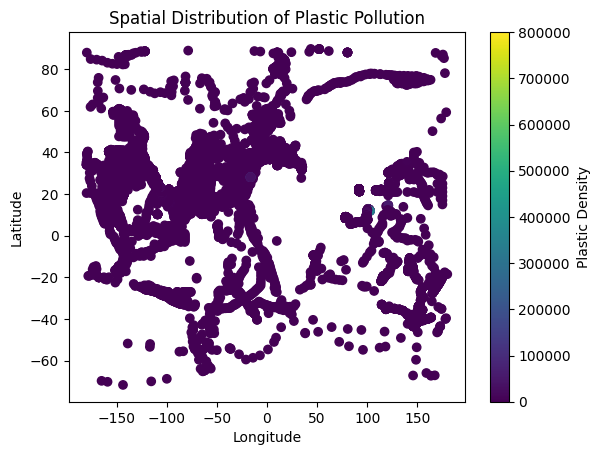

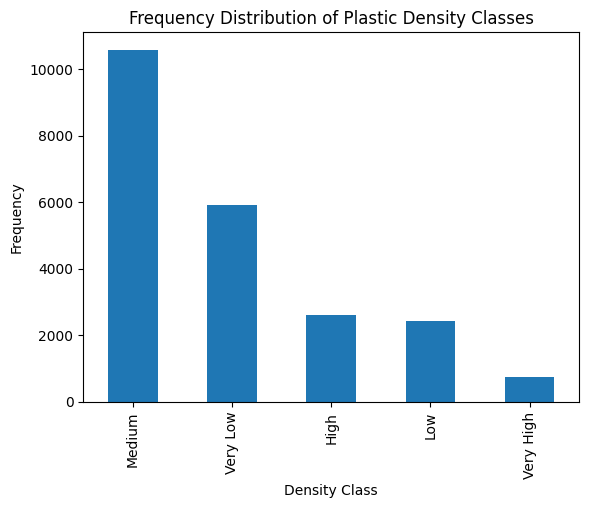

In [ ]:
# Scatter plot
plt.scatter(df['Longitude'], df['Latitude'], c=df['Measurement'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Plastic Pollution')
plt.colorbar(label='Plastic Density')
plt.show()

# Bar chart for frequency distribution of plastic density classes
density_class_counts.plot(kind='bar', xlabel='Density Class', ylabel='Frequency', title='Frequency Distribution of Plastic Density Classes')
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

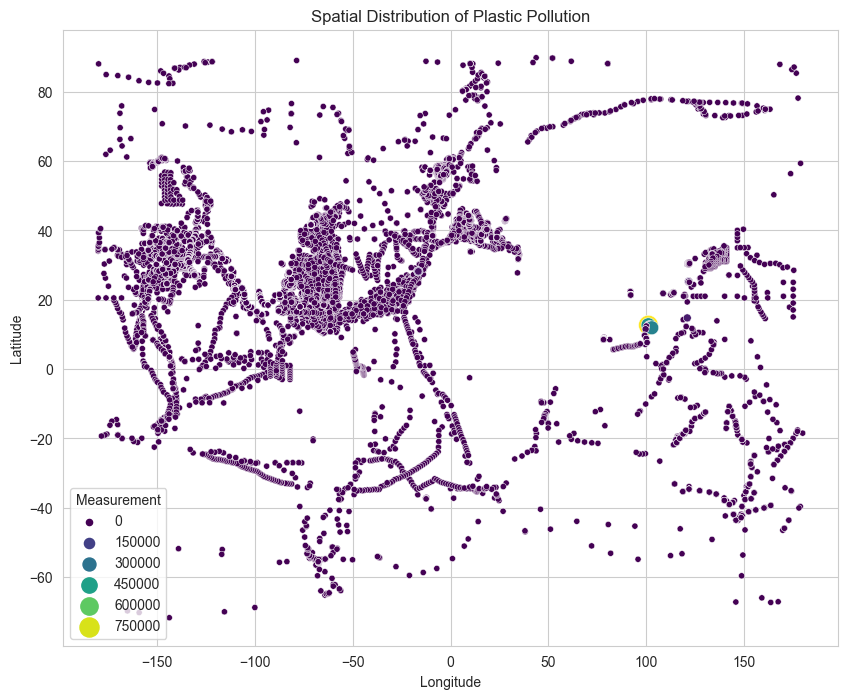

In [ ]:
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set_style("whitegrid")

# Scatter plot with larger figure size and clearer labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Measurement', palette='viridis', size='Measurement', sizes=(20, 200))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Plastic Pollution')
plt.colorbar(label='Plastic Density')
plt.legend(title='Plastic Density', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Bar chart for frequency distribution of plastic density classes with sorted bars
plt.figure(figsize=(10, 6))
density_class_counts.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Density Class')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Plastic Density Classes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Correlation analysis
correlation_matrix = df.corr()

ValueError: could not convert string to float: 'Atlantic Ocean'

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)




Correlation Matrix:
                  OBJECTID  Measurement  Accession Number  Latitude  \
OBJECTID          1.000000     0.060999          0.815485  0.124379   
Measurement       0.060999     1.000000          0.067601 -0.012420   
Accession Number  0.815485     0.067601          1.000000  0.105733   
Latitude          0.124379    -0.012420          0.105733  1.000000   
Longitude         0.088820     0.066736          0.286549 -0.125563   
x                 0.088820     0.066736          0.286549 -0.125563   
y                 0.124379    -0.012420          0.105733  1.000000   

                  Longitude         x         y  
OBJECTID           0.088820  0.088820  0.124379  
Measurement        0.066736  0.066736 -0.012420  
Accession Number   0.286549  0.286549  0.105733  
Latitude          -0.125563 -0.125563  1.000000  
Longitude          1.000000  1.000000 -0.125563  
x                  1.000000  1.000000 -0.125563  
y                 -0.125563 -0.125563  1.000000  


Correlation Matrix:
                  OBJECTID    Oceans   Regions  SubRegions  Sampling Method  \
OBJECTID          1.000000  0.054765 -0.255279   -0.078965        -0.400694   
Oceans            0.054765  1.000000  0.341303    0.093394         0.102519   
Regions          -0.255279  0.341303  1.000000    0.074314         0.135754   
SubRegions       -0.078965  0.093394  0.074314    1.000000        -0.100453   
Sampling Method  -0.400694  0.102519  0.135754   -0.100453         1.000000   
Measurement       0.060999  0.035533 -0.028606    0.009461         0.036960   
Unit             -0.691439  0.159735  0.277916   -0.064375         0.441657   
Density Range     0.483856 -0.019074 -0.130228   -0.090255        -0.192251   
Density Class    -0.224693  0.038832  0.032171    0.106517         0.239091   
Short Reference   0.484392 -0.217333 -0.270813    0.023489        -0.277551   
Long Reference    0.460869 -0.234626 -0.270192   -0.023229        -0.265233   
DOI              -0.632539  0.04

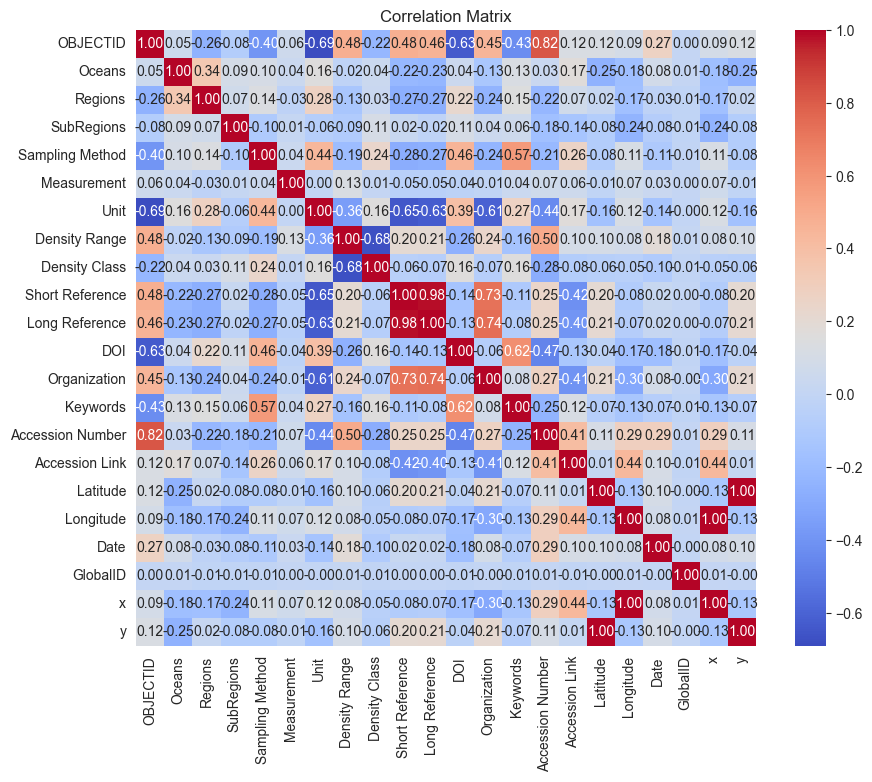

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe
numeric_df = df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column in the dataframe
for column in numeric_df.columns:
    # Check if the column is categorical
    if numeric_df[column].dtype == 'object':
        # Use LabelEncoder to transform categorical values to numeric
        numeric_df[column] = label_encoder.fit_transform(numeric_df[column].astype(str))

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from scipy.stats import f_oneway

# Subset the data for the analysis
subset_df = df[['Oceans', 'Measurement']]
# Drop rows with missing values
subset_df = subset_df.dropna()

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*[subset_df[subset_df['Oceans'] == ocean]['Measurement'] for ocean in subset_df['Oceans'].unique()])

# Print the results
print("ANOVA Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in plastic pollution densities between different oceans.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in plastic pollution densities between different regions.")


ANOVA Results:
F-statistic: 5.588056876965768
p-value: 0.00017160840078799344
Reject the null hypothesis. There is a significant difference in plastic pollution densities between different oceans.


In [ ]:
from scipy.stats import f_oneway

# Subset the data for the analysis
subset_df = df[['Regions', 'Measurement']]
# Drop rows with missing values
subset_df = subset_df.dropna()

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*[subset_df[subset_df['Regions'] == ocean]['Measurement'] for ocean in subset_df['Regions'].unique()])

# Print the results
print("ANOVA Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in plastic pollution densities between different regions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in plastic pollution densities between different regions.")


ANOVA Results:
F-statistic: 11.86933813381816
p-value: 4.2493994392177347e-128
Reject the null hypothesis. There is a significant difference in plastic pollution densities between different regions.


In [ ]:
from scipy.stats import f_oneway

# Subset the data for the analysis
subset_df = df[['SubRegions', 'Measurement']]
# Drop rows with missing values
subset_df = subset_df.dropna()

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*[subset_df[subset_df['SubRegions'] == ocean]['Measurement'] for ocean in subset_df['SubRegions'].unique()])

# Print the results
print("ANOVA Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in plastic pollution densities between different Sub regions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in plastic pollution densities between different Sub regions.")


ANOVA Results:
F-statistic: 27.523486485234237
p-value: 3.3727402207983036e-72
Reject the null hypothesis. There is a significant difference in plastic pollution densities between different Sub regions.


In [ ]:
from scipy.stats import f_oneway, ttest_ind

# Subset the data for the analysis
subset_df = df[['Sampling Method', 'Measurement']]
# Drop rows with missing values
subset_df = subset_df.dropna()



# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*[subset_df[subset_df['Sampling Method'] == method]['Measurement'] for method in subset_df['Sampling Method'].unique()])

# # Perform t-test for each pair of sampling methods
# t_statistic, p_value = ttest_ind(subset_df[subset_df['Sampling Method'] == method1]['Measurement'],
#                                   subset_df[subset_df['Sampling Method'] == method2]['Measurement'])

# Print the results
print("ANOVA Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in plastic pollution densities based on sampling methods.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in plastic pollution densities based on sampling methods.")


ANOVA Results:
F-statistic: 63.958936699283186
p-value: 0.0
Reject the null hypothesis. There is a significant difference in plastic pollution densities based on sampling methods.


Correlation Matrix:
                                                    Measurement  \
Measurement                                            1.000000   
Sampling Method_AVANI net                             -0.002217   
Sampling Method_Aluminum bucket                        0.012064   
Sampling Method_CTD rosette sampler                   -0.002259   
Sampling Method_Day grab                              -0.001404   
...                                                         ...   
Regions_Tasman Sea                                    -0.003727   
Regions_The Coastal Waters of Southeast Alaska ...          NaN   
Regions_Timor Sea                                     -0.001225   
Regions_Tokyo Bay                                      0.002930   
Regions_White Sea                                     -0.000824   

                                                    Sampling Method_AVANI net  \
Measurement                                                         -0.002217   
Sampling Meth

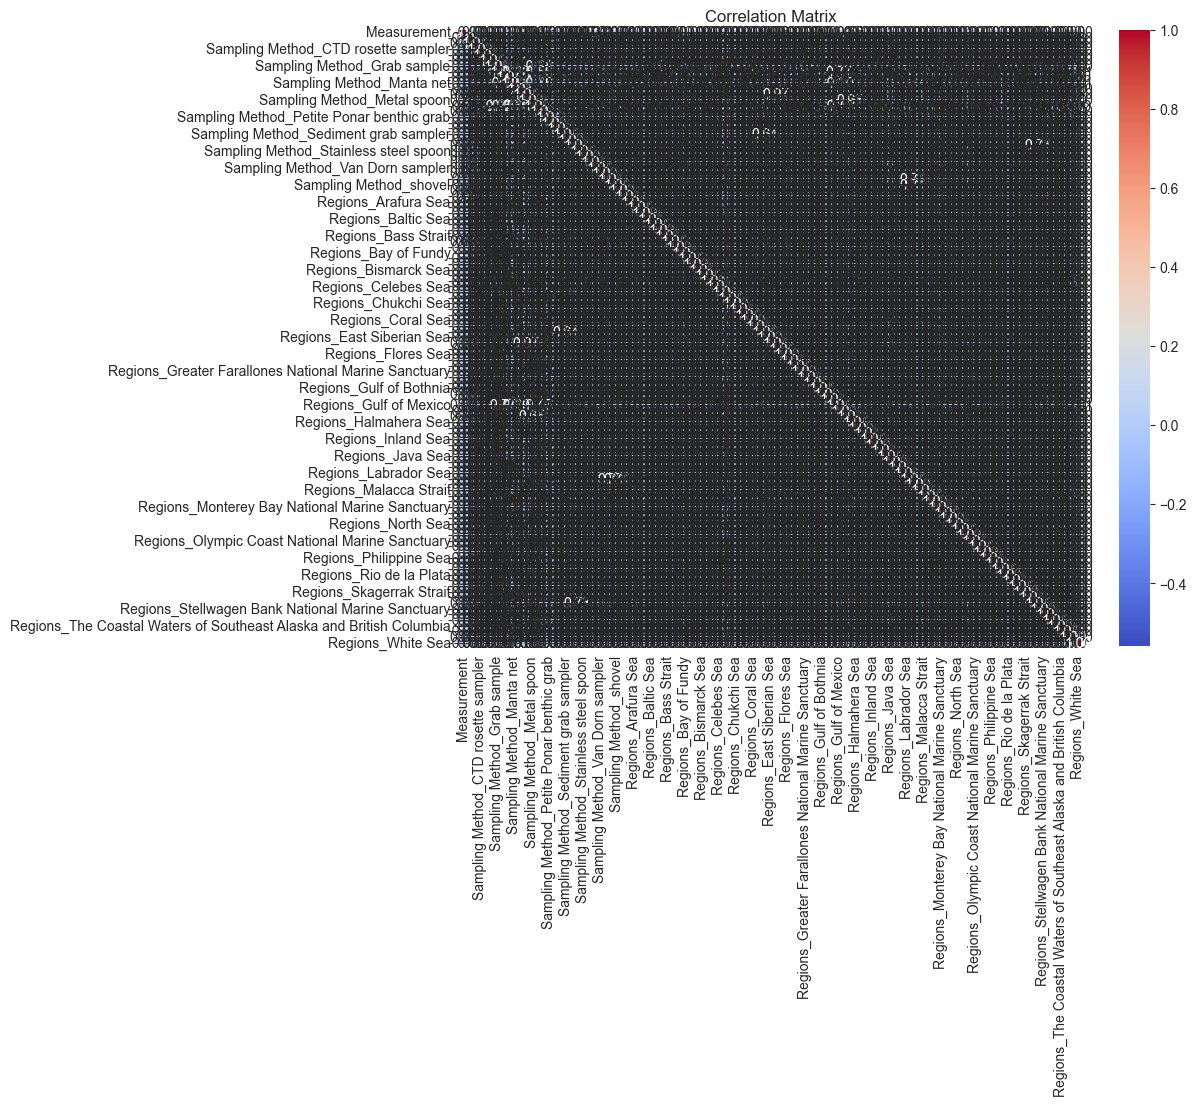

In [ ]:
# Importing necessary libraries
import numpy as np

# Assuming 'Measurement' represents plastic pollution densities
# Let's select relevant columns for correlation analysis
correlation_df = df[['Measurement', 'Sampling Method', 'Regions']]

# Convert categorical variables to numerical using one-hot encoding
correlation_df = pd.get_dummies(correlation_df, columns=['Sampling Method', 'Regions'])

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

file_path = r"E:\Latest Work\Dissertations\Jatinder Jot 6794079\Dataset\Marine_Microplastics_WGS84_5159774935198085819.xlsx"
df = pd.read_excel(file_path)

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


# Drop rows with missing values
df = df.dropna()

# Define independent variables (features) and dependent variable (target)
X = df[['Oceans', 'Regions', 'SubRegions', 'Sampling Method']]
y = df['Measurement']

# Encode categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Convert sparse matrix to dense array
X_encoded_dense = X_encoded.toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_dense, y, test_size=0.2, random_state=42)

# Add constant term for intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print summary of the regression model
print(results.summary())

# Predict on the test set
y_pred = results.predict(X_test)

# Evaluate the model
mse = ((y_pred - y_test) ** 2).mean()
print("Mean Squared Error:", mse)


                            OLS Regression Results                            
Dep. Variable:            Measurement   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     20.24
Date:                Sun, 12 May 2024   Prob (F-statistic):           3.51e-69
Time:                        12:16:29   Log-Likelihood:                -8853.3
No. Observations:                1160   AIC:                         1.775e+04
Df Residuals:                    1136   BIC:                         1.788e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.767e+13    4.1e+14     -0.067      0.9